In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
import glob
print(glob.glob("**/healthcare-dataset-stroke-data.csv",recursive=True))

['Data\\healthcare-dataset-stroke-data.csv']


In [3]:
df=pd.read_csv('Data\\stroke_prediction_dataset.csv')
df.head()

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


In [4]:
df.Diagnosis.value_counts()

No Stroke    7532
Stroke       7468
Name: Diagnosis, dtype: int64

In [5]:
columns=['Patient ID','Patient Name']
df.drop(columns=columns,axis=1,inplace=True)

In [6]:
df

,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,56,Male,0,1,Married,Self-employed,Rural,130.91,22.37,Non-smoker,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,80,Male,0,0,Single,Self-employed,Urban,183.73,32.57,Non-smoker,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,26,Male,1,1,Married,Never Worked,Rural,189.00,20.32,Formerly Smoked,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,73,Male,0,0,Married,Never Worked,Urban,185.29,27.50,Non-smoker,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,51,Male,1,1,Divorced,Self-employed,Urban,177.34,29.06,Currently Smokes,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,88,Female,1,1,Divorced,Self-employed,Urban,160.22,39.73,Currently Smokes,Social Drinker,High,0,No,Paleo,1.12,171/92,"HDL: 44, LDL: 153",NaN,No Stroke
14996,47,Female,0,0,Married,Private,Urban,107.58,22.17,Non-smoker,Never,Low,1,No,Gluten-Free,1.47,155/71,"HDL: 35, LDL: 183",Difficulty Speaking,No Stroke
14997,35,Male,0,0,Married,Government Job,Rural,134.90,26.38,Non-smoker,Rarely,High,1,No,Paleo,0.51,121/110,"HDL: 57, LDL: 159","Difficulty Speaking, Severe Fatigue, Headache",Stroke
14998,73,Male,0,0,Single,Self-employed,Urban,169.42,28.32,Non-smoker,Never,High,0,Yes,Paleo,1.53,157/74,"HDL: 79, LDL: 91","Severe Fatigue, Numbness, Confusion, Dizziness...",No Stroke


In [7]:
df.Diagnosis.value_counts(normalize=True)*100

No Stroke    50.213333
Stroke       49.786667
Name: Diagnosis, dtype: float64

In [8]:
df.Diagnosis = (df.Diagnosis.str.strip().str.lower() == 'stroke').astype(int)


In [9]:
X=df.drop('Diagnosis',axis=1)
y=df[['Diagnosis']]

In [10]:
y.value_counts()

Diagnosis
0            7532
1            7468
dtype: int64

In [11]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

In [13]:
numerical_columns=X.select_dtypes(exclude='object').columns
numerical_columns

Index(['Age', 'Hypertension', 'Heart Disease', 'Average Glucose Level',
       'Body Mass Index (BMI)', 'Stroke History', 'Stress Levels'],
      dtype='object')

In [14]:
categorical_columns=X.select_dtypes(include='object').columns
categorical_columns



Index(['Gender', 'Marital Status', 'Work Type', 'Residence Type',
       'Smoking Status', 'Alcohol Intake', 'Physical Activity',
       'Family History of Stroke', 'Dietary Habits', 'Blood Pressure Levels',
       'Cholesterol Levels', 'Symptoms'],
      dtype='object')

In [15]:
num_pipeline=Pipeline(
    steps=[
        ('scaler',StandardScaler()),
        ('imputer',SimpleImputer(strategy='median'))
    ]
)
cat_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('onehot',OneHotEncoder(handle_unknown='ignore',sparse_output=False))
        
    ]
)

preprocessor=ColumnTransformer(
    [
        ('num_pipeline',num_pipeline,numerical_columns),
        ('categorical_columns',cat_pipeline,categorical_columns)
    ]
)

In [16]:
X_train=preprocessor.fit_transform(X_train)
X_train

array([[ 0.14127454,  1.73474931,  1.00568281, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.23630759, -0.57645217,  1.00568281, ...,  0.        ,
         0.        ,  0.        ],
       [-0.52395678, -0.57645217, -0.9943493 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.38140721,  1.73474931,  1.00568281, ...,  0.        ,
         0.        ,  0.        ],
       [-1.47428724,  1.73474931, -0.9943493 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33134063, -0.57645217,  1.00568281, ...,  0.        ,
         0.        ,  0.        ]])

In [17]:
X_test=preprocessor.transform(X_test)
X_test

array([[ 0.80650586,  1.73474931,  1.00568281, ...,  0.        ,
         0.        ,  0.        ],
       [-0.95160548, -0.57645217, -0.9943493 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.7093198 , -0.57645217,  1.00568281, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.90408896, -0.57645217,  1.00568281, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14127454,  1.73474931, -0.9943493 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.42892373, -0.57645217, -0.9943493 , ...,  0.        ,
         0.        ,  0.        ]])

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
acc=round(acc,4)
acc

0.4923

In [26]:
from sklearn.metrics import roc_auc_score
y_pred=model.predict_proba(X_test)[:,1]
auc=roc_auc_score(y_test,y_pred)
auc


0.49144196024339903

In [27]:
y_pred_train=model.predict(X_train)
acc_train=accuracy_score(y_train,y_pred_train)
acc_train


0.9398333333333333

# Check for overfitting and underfitting

In [28]:
print(f'testing accuracy score:{acc}')
print(f'training accuracy score:{acc_train}')



testing accuracy score:0.49233333333333335
training accuracy score:0.9398333333333333


# There is overfiiting in our model

In [35]:
model=LogisticRegression(C=0.01,solver='liblinear')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
acc=round(acc,4)
acc

0.5067

# Compare model accuracy with null accuracy

In [37]:
df.Diagnosis.value_counts()

0    7532
1    7468
Name: Diagnosis, dtype: int64

In [40]:
null_accuracy=7532/(7532+7468)
round(null_accuracy,4)

0.5021

## We can see that our model accuracy score is 0.4923 but null accuracy score is 0.5021. So, we can conclude that our Logistic Regression model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.

In [41]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[878, 603],
       [877, 642]], dtype=int64)

In [42]:
TP=878
TN=642
FP=603
FN=877

# Decision Trees
First we are going to get the default model performance and then we are going to tune it using the following parameters:

- max_depth
- min_samples_leaf

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict_proba(X_test)[:,1]
auc=roc_auc_score(y_test,y_pred)

In [44]:
auc

0.5141922770720102

In [45]:
depths = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 50]
for d in depths:
    dt=DecisionTreeClassifier(max_depth=d,random_state=1,n_jobs=-1)
    dt.fit(X_train,y_train)
    y_pred=dt.predict_proba(X_test)[:,0]
    score=roc_auc_score(y_test,y_pred)
    print(d,score)
    

2 0.5000506747971564
3 0.5000506747971564
4 0.49112746533999463
5 0.4907791872384858
6 0.49159265108757444
7 0.4878965025055131
8 0.4838580767847641
9 0.49327469874055346
10 0.4794864864985004
15 0.48498936940549126
20 0.4746401533757194
50 0.48819632838868815


In [48]:
depths = [2,3,4]
sample_leafs = [1, 2, 5, 10, 15, 20, 100, 200, 500]
scores=[]
for d in depths:
    for s in sample_leafs:
        dt=DecisionTreeClassifier(max_depth=d,min_samples_leaf=s)
        dt.fit(X_train,y_train)
        y_pred=dt.predict_proba(X_test)[:,1]
        score=roc_auc_score(y_test,y_pred)
        scores.append((d,s,round(score,4)))

<AxesSubplot:xlabel='depth', ylabel='leaf'>

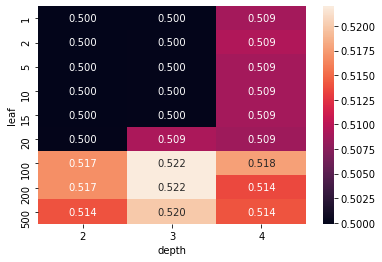

In [54]:
df_scores=pd.DataFrame(scores,columns=['depth','leaf','score'])
sns.heatmap(df_scores.pivot(index='leaf',columns='depth',values='score'),fmt='.3f',annot=True)

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)
y_pred=rf.predict_proba(X_test)
score=roc_auc_score(y_test,y_pred)
score

ValueError: y should be a 1d array, got an array of shape (3000, 2) instead.